# Herkenning van handgeschreven cijfers met Machine Learning

## k-Nearest Neigbours

Stijn Oomes

donderdag 11 februari 2020


## Importeer libraries

In [71]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist

## Verover de data

In [72]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [73]:
X_train_images.shape

(60000, 28, 28)

In [74]:
y_train_labels.shape

(60000,)

Hier check ik hoeveel unieke labels er zijn. (En het voldoet aan mijn verwachting.)

In [75]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [76]:
X_test_images.shape

(10000, 28, 28)

In [77]:
y_test_labels.shape

(10000,)

Ik kijk nog even naar een aantal voorbeelden van de labels.

In [78]:
print(y_train_labels[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


## Toon 12 random cijfers

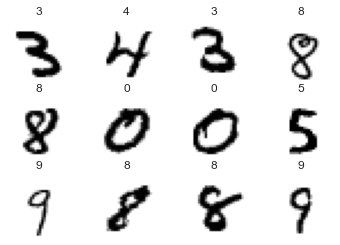

In [79]:
for sub in range(1, 13):
        plt.subplot(3,4, sub)
        i = np.random.randint(60000)

        plt.imshow(255 - X_train_images[i], cmap='gray')
        plt.title(y_train_labels[i]);
        plt.axis("off")

## Maak de images geschikt voor ML modellen

**OPDRACHT**: "flatten" de images naar een nieuwe data structuur met dimensies (60000, 28*28)

In [80]:
X_train_images_flatten = X_train_images.reshape(60000, 784)

In [81]:
X_train_images_flatten.shape

(60000, 784)

In [82]:
X_test_images_flatten =  X_test_images.reshape(10000, 784)

In [83]:
X_test_images_flatten.shape


(10000, 784)

## k-Nearest Neighbours


Het is beter om in eerste instantie slechts een deel van de training set en de test set te gebruiken, bijvoorbeeld 10%.

Het trainen duurt niet lang, maar het voorspellen kan zeer rekenintensief zijn.

Gebruik %%timeit om deze bewering te controleren.

In [84]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

**OPDRACHT**: train de kNN met fit() en pas het model toe met predict(). Kies eerst 10% van de train set en test set. Je mag dat later verruimen.

In [85]:
%%timeit
knn.fit(X_train_images_flatten,y_train_labels)

3.2 ms ± 65 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
%%timeit
y_predicted_labels = knn.predict(X_test_images_flatten)
print(accuracy_score(y_predicted_labels,y_test_labels))

0.9691
0.9691
0.9691
0.9691
0.9691
0.9691
0.9691
0.9691
17.7 s ± 582 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**OPDRACHT**: Hoe snel is het testen ten opzichte van het trainen?

In [ ]:
# train/test
17.7/0.9691

Ik herhaal hier even dezelfde code omdat variabelen binnen de %%timeit niet toegankelijk zijn buiten de %%timeit.

In [88]:
y_predicted_labels = knn.predict(X_test_images_flatten)
print(accuracy_score(y_test_labels, y_predicted_labels))

0.9691


In [89]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)

print(cm)

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    7  989    2    0    0    2   17    4    0]
 [   0    2    3  973    1   13    1    7    4    6]
 [   2    7    0    0  943    0    4    3    0   23]
 [   4    0    0    9    2  861    6    1    4    5]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   20    4    0    3    0    0  990    0   11]
 [   7    3    5   12    5   11    5    5  916    5]
 [   3    5    3    7    7    3    1   11    2  967]]


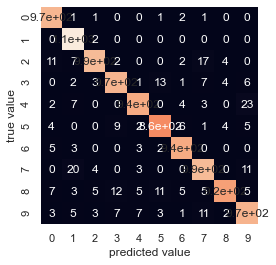

In [90]:
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Toon 12 voorbeelden van fouten van het model

Ik bepaal eerst welke cijfers fout zijn gecategoriseerd.

In [95]:
mistakes =  y_test_labels!= y_predicted_labels

Ik bekijk een aantal voorbeelden.

In [92]:
mistakes[:100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

En bepaal hoeveel fouten er zijn:

In [93]:
np.count_nonzero(mistakes)

36

Ik wil hier alleen de fout gecategoriseerde cijfers plotten.

Op dit moment worden 12 willekeurige cijfers uit de *hele* test set gekozen.

**OPDRACHT**: schrijf de code om naar alleen fout geclassificeerde cijfers.

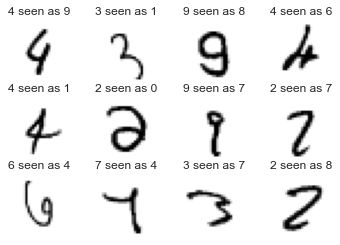

In [116]:
mistake_list = np.where(mistakes == True)[0][:13]

for sub in range(1,13):
        plt.subplot(3,4, sub)
        i = mistake_list[sub]
        plt.axis("off")
        plt.imshow(255 - X_test_images[i,:,:], cmap='gray')
        predicted_number = y_predicted_labels[i]
        actual_number = y_test_labels[i]
        plt.title('{0} seen as {1}'.format(actual_number, predicted_number))
